# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [122]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd

,City
0,pevek
1,the valley
2,hilo
3,albany
4,jamestown
...,...
591,karasjok
592,sisimiut
593,baiyin
594,mahibadhoo


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [123]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

total_data = cities_pd
total_data['Cloudiness'] = 0
total_data['Country'] = ''
total_data['Date'] = 0
total_data['Humidity'] = 0
total_data['Lat'] = 0
total_data['Lng'] = 0
total_data['Max Temp'] = 0
total_data['Wind Speed'] = 0
params = {}


# Loop through the list of cities and perform a request for data on each
print("--------------------------------------")
print("----- BEGGINING DATA RETRIEVAL -------")
print("--------------------------------------")

for index, row in total_data.iterrows():
        # get city from df
        city = row['City']
    
        # add keyword to params dict
        params['city_name'] = city
    
        # assemble url and make API request
        response = requests.get(query_url + row['City']).json()
    
        try:
            print(f"Processing Record {index} ｜ {city}.")
        
            total_data.loc[index, 'Cloudiness'] = float(response['clouds']['all'])
            total_data.loc[index, 'Country'] = response['sys']['country']
            total_data.loc[index, 'Date'] = float(response['dt'])
            total_data.loc[index, 'Humidity'] = float(response['main']['humidity'])
            total_data.loc[index, 'Lat'] = float(response['coord']['lat'])      
            total_data.loc[index, 'Lng'] = float(response['coord']['lon'])
            total_data.loc[index, 'Max Temp'] = float(response['main']['temp_max'])
            total_data.loc[index, 'Wind Speed'] = float(response['wind']['speed'])
                    
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
print("--------------------------------------")
print("-------- RETRIVAL COMPLETE -----------")
print("--------------------------------------")
total_data

--------------------------------------
----- BEGGINING DATA RETRIEVAL -------
--------------------------------------
Processing Record 0 ｜ pevek.
Processing Record 1 ｜ the valley.
Processing Record 2 ｜ hilo.
Processing Record 3 ｜ albany.
Processing Record 4 ｜ jamestown.
Processing Record 5 ｜ busselton.
Processing Record 6 ｜ kapaa.
Processing Record 7 ｜ flin flon.
Processing Record 8 ｜ bargal.
Missing field/result... skipping.
Processing Record 9 ｜ carnarvon.
Processing Record 10 ｜ baghdad.
Processing Record 11 ｜ longyearbyen.
Processing Record 12 ｜ rikitea.
Processing Record 13 ｜ lardos.
Processing Record 14 ｜ cidreira.
Processing Record 15 ｜ kodiak.
Processing Record 16 ｜ hobart.
Processing Record 17 ｜ rawannawi.
Missing field/result... skipping.
Processing Record 18 ｜ vaini.
Processing Record 19 ｜ puerto ayora.
Processing Record 20 ｜ atuona.
Processing Record 21 ｜ belyy yar.
Processing Record 22 ｜ isangel.
Processing Record 23 ｜ san blas.
Processing Record 24 ｜ punta arenas.
Processi

Processing Record 215 ｜ ucluelet.
Processing Record 216 ｜ garden city.
Processing Record 217 ｜ saint-paul.
Processing Record 218 ｜ kankan.
Processing Record 219 ｜ saiha.
Processing Record 220 ｜ inta.
Processing Record 221 ｜ chapais.
Processing Record 222 ｜ lunenburg.
Processing Record 223 ｜ basarabeasca.
Processing Record 224 ｜ grand river south east.
Missing field/result... skipping.
Processing Record 225 ｜ portales.
Processing Record 226 ｜ pisco.
Processing Record 227 ｜ moreno.
Processing Record 228 ｜ safranbolu.
Processing Record 229 ｜ borovskoy.
Processing Record 230 ｜ yantai.
Processing Record 231 ｜ lebu.
Processing Record 232 ｜ srednekolymsk.
Processing Record 233 ｜ nortelandia.
Processing Record 234 ｜ maniitsoq.
Processing Record 235 ｜ dagda.
Processing Record 236 ｜ san martin.
Processing Record 237 ｜ rio gallegos.
Processing Record 238 ｜ new norfolk.
Processing Record 239 ｜ port lincoln.
Processing Record 240 ｜ broome.
Processing Record 241 ｜ amderma.
Missing field/result... sk

Processing Record 433 ｜ dingle.
Processing Record 434 ｜ havoysund.
Processing Record 435 ｜ port hawkesbury.
Processing Record 436 ｜ zalantun.
Processing Record 437 ｜ tomatlan.
Processing Record 438 ｜ unye.
Missing field/result... skipping.
Processing Record 439 ｜ mujiayingzi.
Processing Record 440 ｜ malko tarnovo.
Processing Record 441 ｜ balakhninskiy.
Processing Record 442 ｜ narsaq.
Processing Record 443 ｜ anderson.
Processing Record 444 ｜ kibala.
Processing Record 445 ｜ kashi.
Missing field/result... skipping.
Processing Record 446 ｜ aranos.
Processing Record 447 ｜ oxford.
Processing Record 448 ｜ kon tum.
Processing Record 449 ｜ chingirlau.
Processing Record 450 ｜ verkhnetulomskiy.
Processing Record 451 ｜ ekhabi.
Processing Record 452 ｜ road town.
Processing Record 453 ｜ ancud.
Processing Record 454 ｜ te anau.
Processing Record 455 ｜ hudson bay.
Processing Record 456 ｜ sompeta.
Processing Record 457 ｜ puertollano.
Processing Record 458 ｜ anadyr.
Processing Record 459 ｜ emerald.
Proce

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,100.0,RU,1.569250e+09,79.0,69.70,170.27,1.74,6.02
1,the valley,100.0,AI,1.569250e+09,70.0,18.22,-63.06,31.00,6.70
2,hilo,90.0,US,1.569250e+09,88.0,19.71,-155.08,25.00,3.10
3,albany,75.0,US,1.569250e+09,61.0,42.65,-73.75,28.33,5.70
4,jamestown,0.0,AU,1.569250e+09,94.0,-33.21,138.60,4.14,1.07
...,...,...,...,...,...,...,...,...,...
591,karasjok,75.0,NO,1.569250e+09,80.0,69.47,25.52,4.00,7.70
592,sisimiut,100.0,GL,1.569250e+09,89.0,66.94,-53.67,4.24,4.72
593,baiyin,0.0,CN,1.569250e+09,100.0,36.55,104.13,10.00,1.00
594,mahibadhoo,100.0,MV,1.569250e+09,77.0,3.78,72.97,28.44,5.19


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [161]:
total_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,100.0,RU,1.569250e+09,79.0,69.70,170.27,1.74,6.02
1,the valley,100.0,AI,1.569250e+09,70.0,18.22,-63.06,31.00,6.70
2,hilo,90.0,US,1.569250e+09,88.0,19.71,-155.08,25.00,3.10
3,albany,75.0,US,1.569250e+09,61.0,42.65,-73.75,28.33,5.70
4,busselton,100.0,AU,1.569250e+09,54.0,-33.64,115.35,12.78,4.69


### Cleaning up data 

In [162]:
# Cleanning Data
# Eliminating values in zero
total_data = total_data[(total_data != 0).all(1)]
# Resetting index
total_data = total_data.reset_index(drop = True) 
total_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,100.0,RU,1.569250e+09,79.0,69.70,170.27,1.74,6.02
1,the valley,100.0,AI,1.569250e+09,70.0,18.22,-63.06,31.00,6.70
2,hilo,90.0,US,1.569250e+09,88.0,19.71,-155.08,25.00,3.10
3,albany,75.0,US,1.569250e+09,61.0,42.65,-73.75,28.33,5.70
4,busselton,100.0,AU,1.569250e+09,54.0,-33.64,115.35,12.78,4.69
...,...,...,...,...,...,...,...,...,...
404,polis,20.0,CY,1.569250e+09,69.0,35.04,32.42,27.00,7.70
405,karasjok,75.0,NO,1.569250e+09,80.0,69.47,25.52,4.00,7.70
406,sisimiut,100.0,GL,1.569250e+09,89.0,66.94,-53.67,4.24,4.72
407,mahibadhoo,100.0,MV,1.569250e+09,77.0,3.78,72.97,28.44,5.19


### Verifiying if all the columns have the same data

In [163]:
total_data.count()

City          409
Cloudiness    409
Country       409
Date          409
Humidity      409
Lat           409
Lng           409
Max Temp      409
Wind Speed    409
dtype: int64

### Export Data to a CSV File

In [164]:
export_csv = total_data.to_csv (r'Output Data Weather/Cities.csv', index = "City", header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Verify data types to plot

In [165]:
total_data.dtypes

City           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

#### Create a Function to Plot

In [166]:
def scatter_plot(x_values,y_values, title, x_label, y_label, file_name):
    plt.scatter(x_values,y_values)
    plt.title(title,fontweight="bold");
    plt.xlabel(x_label,fontweight="bold");
    plt.ylabel(y_label,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    plt.savefig('Output Data Weather/'+ file_name +'.png')
    plt.show()

#### Latitude vs. Temperature Plot

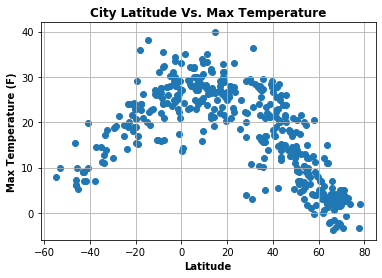

In [167]:
x_values = total_data['Lat']
y_values = total_data['Max Temp']
title = "City Latitude Vs. Max Temperature"
x_label = "Latitude"
y_label = "Max Temperature (F)"
file_name = "Fig.1 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Humidity Plot

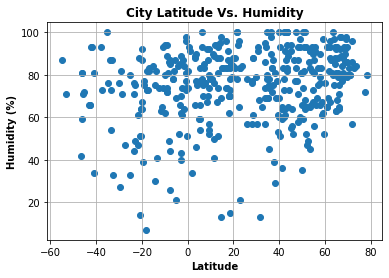

In [168]:
x_values = total_data['Lat']
y_values = total_data['Humidity']
title = "City Latitude Vs. Humidity"
x_label = "Latitude"
y_label = "Humidity (%)"
file_name = "Fig.2 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Cloudiness Plot

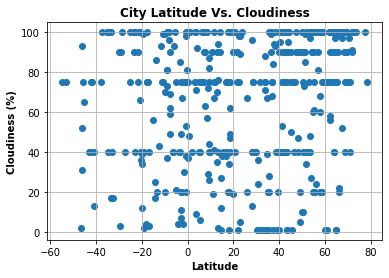

In [169]:
x_values = total_data['Lat']
y_values = total_data['Cloudiness']
title = "City Latitude Vs. Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness (%)"
file_name = "Fig.3 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Wind Speed Plot

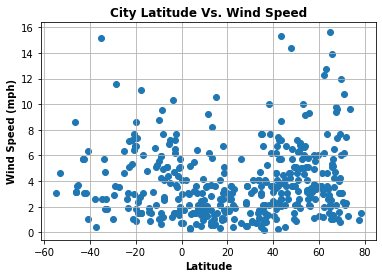

In [170]:
x_values = total_data['Lat']
y_values = total_data['Wind Speed']
title = "City Latitude Vs. Wind Speed"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
file_name = "Fig.4 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

## Linear Regression

### Function to Plot the Linear Regression

In [171]:
# OPTIONAL: Create a function to create Linear Regression plots

def scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, eq_location):
    # Define the Location of the Linear Regression Equation
    if eq_location == 'UpperRight':
        loc_x = x_values.max()
        loc_y = y_values.max()
    elif eq_location == 'LowerRight':
        loc_x = x_values.max() - (x_values.max()-x_values.min())/2
        loc_y = y_values.min() 
    elif eq_location == 'UpperLeft':
        loc_x = x_values.min()
        loc_y = y_values.max() - (y_values.max()-y_values.min())/8
    elif eq_location == 'LowerLeft':
        loc_x = x_values.min()
        loc_y = y_values.min()
    elif eq_location == 'Middle':
        loc_x = (x_values.max()+ x_values.min())/2
        loc_y = (y_values.max()+ y_values.min())/2
    
    # Perform a linear regression on latitude vs. temperature
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    # print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"firebrick")

    # Label plot and annotate the line equation
    plt.annotate(line_eq,(loc_x,  loc_y),
                 fontsize=15,color="firebrick")   
    plt.title(chart_title ,fontweight="bold");
    plt.xlabel(x_label ,fontweight="bold");
    plt.ylabel(y_label ,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    # Save Plot
    plt.savefig('Output Data Weather/'+ file_name +'.png')
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()

### Southern Hempisphere Data

In [172]:
# Create Southern Hemisphere DataFrames
total_data_south = total_data.loc[(total_data['Lat'] >= -90) & (total_data['Lat'] <= 0)]
total_data_south

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,busselton,100.0,AU,1.569250e+09,54.0,-33.64,115.35,12.78,4.69
8,rikitea,100.0,PF,1.569250e+09,75.0,-23.12,-134.97,20.14,7.15
10,hobart,40.0,AU,1.569250e+09,66.0,-42.88,147.33,9.00,5.70
12,puerto ayora,75.0,EC,1.569250e+09,77.0,-0.74,-90.35,21.00,5.10
13,atuona,70.0,PF,1.569250e+09,80.0,-9.80,-139.03,25.94,8.76
...,...,...,...,...,...,...,...,...,...
388,palora,75.0,EC,1.569250e+09,64.0,-1.70,-77.97,23.00,2.60
394,puerto leguizamo,81.0,CO,1.569250e+09,51.0,-0.19,-74.78,33.04,0.75
400,camapua,99.0,BR,1.569250e+09,39.0,-19.53,-54.04,29.14,7.35
401,tiarei,75.0,PF,1.569250e+09,73.0,-17.53,-149.33,24.00,1.50


### Northern Hemisphere Data

In [173]:
# Create Northern Hemisphere DataFrames
total_data_north = total_data.loc[(total_data['Lat'] >= 0) & (total_data['Lat'] <= 90)]
total_data_north

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,100.0,RU,1.569250e+09,79.0,69.70,170.27,1.74,6.02
1,the valley,100.0,AI,1.569250e+09,70.0,18.22,-63.06,31.00,6.70
2,hilo,90.0,US,1.569250e+09,88.0,19.71,-155.08,25.00,3.10
3,albany,75.0,US,1.569250e+09,61.0,42.65,-73.75,28.33,5.70
5,kapaa,1.0,US,1.569250e+09,94.0,22.08,-159.32,27.00,3.10
...,...,...,...,...,...,...,...,...,...
403,eaglesfield,100.0,GB,1.569250e+09,73.0,54.64,-3.40,19.44,3.13
404,polis,20.0,CY,1.569250e+09,69.0,35.04,32.42,27.00,7.70
405,karasjok,75.0,NO,1.569250e+09,80.0,69.47,25.52,4.00,7.70
406,sisimiut,100.0,GL,1.569250e+09,89.0,66.94,-53.67,4.24,4.72


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8381316286749715


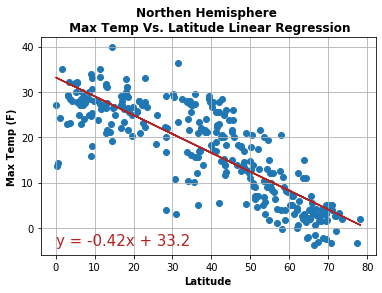

In [174]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Max Temp"]
chart_title = "Northen Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.5 - Northen Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'LowerLeft')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8005286230358017


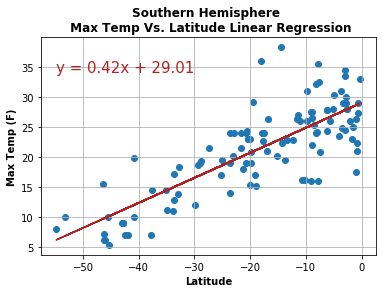

In [175]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Max Temp"]
chart_title = "Southern Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.6 - Southern Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12347460947908061


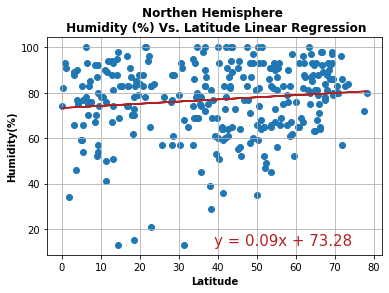

In [176]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Humidity"]
chart_title = "Northen Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.7 - Northen Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerRight')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.028122581530186232


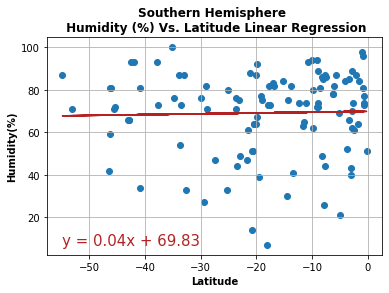

In [177]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Humidity"]
chart_title = "Southern Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.8 - Southern Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerLeft')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18031488606688495


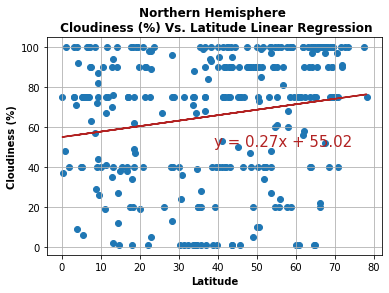

In [178]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Cloudiness"]
chart_title = "Northern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.9 - Northern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'Middle')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.03195320026284338


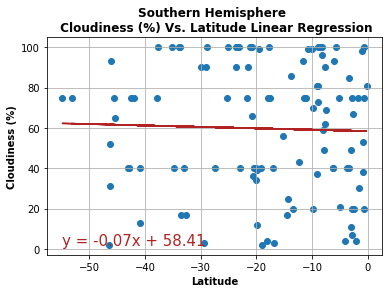

In [179]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Cloudiness"]
chart_title = "Southern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.10 - Southern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerLeft')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.3229358536145215


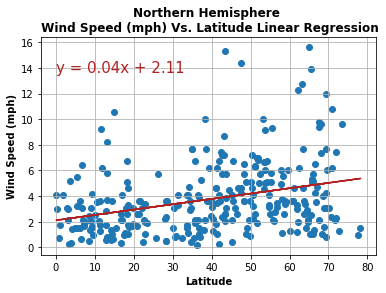

In [180]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Wind Speed"]
chart_title = "Northern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.11 - Northern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.015249495898225576


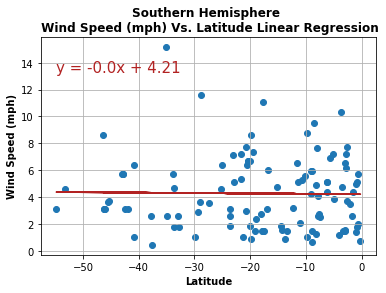

In [181]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Wind Speed"]
chart_title = "Southern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.12 - Southern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')